In [1]:
import numpy as np
import pandas as pd

from scipy import spatial
import matplotlib.pyplot as plt
import gensim
from sklearn.manifold import TSNE

# from src_py.utils import 

In [2]:
# global variables
ROOT_DIR = '/Users/stefanialavattiata/Desktop/BrainstorML/src_py'
DATA_DIR = f'{ROOT_DIR}/data/'

In [3]:
# load the whole embedding into memory       
embeddings_dict={}
with open(f'{DATA_DIR}/glove.6B.100d.txt','r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embeddings_dict[word]=vectors
f.close()
print('Loaded %s word vectors.' % len(embeddings_dict))

Loaded 400000 word vectors.


In [4]:
# display a single vector (embedding)
embeddings_dict['design']

array([-0.10159  ,  0.27491  , -0.45296  ,  0.16752  ,  0.59923  ,
       -0.80049  ,  0.39553  , -0.069191 , -0.32806  ,  1.4265   ,
        0.31576  , -0.84981  ,  0.26073  , -0.31742  , -0.12402  ,
        0.20956  ,  0.26322  ,  0.69942  , -0.091188 , -0.15548  ,
       -0.87573  , -0.77778  ,  0.23715  , -0.66528  ,  0.48373  ,
       -0.51719  , -0.24449  , -0.3951   , -0.58762  , -0.60386  ,
       -0.66735  ,  1.039    , -0.51326  ,  0.032116 ,  0.20098  ,
        0.35802  ,  0.015017 , -0.28235  ,  0.065305 , -0.43247  ,
        0.17061  , -0.70985  , -0.28024  ,  0.26596  , -0.1753   ,
        0.10066  ,  0.17453  ,  0.076265 , -0.18259  ,  0.050783 ,
        0.23142  , -0.062024 , -0.16807  ,  0.73151  ,  0.1688   ,
       -2.3304   , -0.15986  ,  0.25371  ,  1.5799   , -0.25435  ,
        0.17311  ,  0.73297  ,  0.061702 ,  1.3885   ,  0.71277  ,
       -0.56839  , -0.18891  ,  0.27     , -0.21111  , -0.11889  ,
       -0.28836  ,  0.61762  , -0.10381  , -0.19017  ,  0.3406

In [5]:
# define (euclidean) distance function 
def find_closest_embeddings(embedding): 
    return sorted(embeddings_dict.keys(), 
                    key=lambda word: spatial.distance.euclidean(embeddings_dict[word],embedding))

In [57]:
print(find_closest_embeddings(embeddings_dict["focus"])[1:10])

['focused', 'focusing', 'emphasis', 'continuing', 'emphasize', 'attention', 'push', 'particular', 'focuses']


In [52]:
bml_1 = pd.read_csv (f'{DATA_DIR}/test_data/bml_words1.csv')
bml_2 = pd.read_csv (f'{DATA_DIR}/test_data/bml_words2.csv')
bml_3 = pd.read_csv (f'{DATA_DIR}/test_data/bml_words3.csv')
bml_2

,bml_words2
0,Technology
1,automate
2,Community
3,Computers
4,Robots
5,Math
6,Focus
7,networking
8,Learning
9,Collaboration


In [63]:
def clean_word(my_str):
    my_str = str(my_str).lower()
    punc = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
    for ele in my_str:  
        if ele in punc:  
            my_str = my_str.replace(ele, "")
    return my_str

In [64]:
embeddings_query = []
embeddings_words = []
for idx, row in bml_2.iterrows():
    word = clean_word(row['bml_words2'])
    embedding = embeddings_dict[word]
    embeddings_query.append(embedding)
    embeddings_words.append(row['bml_words2'])
    
embeddings_query = np.vstack(embeddings_query)  
print("embeddings_query.shape", embeddings_query.shape)

embeddings_query.shape (20, 100)


word_vectors.shape (20, 2)


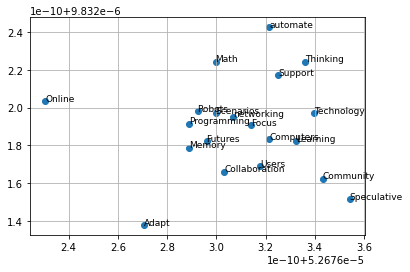

In [65]:
word_vectors = TSNE(n_components = 2, random_state=0,
                    learning_rate = 0.05).fit_transform(embeddings_query)
 
print("word_vectors.shape", word_vectors.shape)

x_coords, y_coords = word_vectors[:,0], word_vectors[:,1]
plt.scatter(x_coords, y_coords)

for label, x, y in zip(embeddings_words, x_coords, y_coords):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points', fontsize=9)
plt.grid()
plt.show()

# TSNE MEDIUM POST

In [19]:
def display_closestwords_tsnescatterplot(model, word):
    
    arr = np.empty((0,300), dtype='f')
    word_labels = [word]

    # get close words
    close_words = model.similar_by_word(word)
    
    # add the vector for each of the closest words to the array
    arr = np.append(arr, np.array([model[word]]), axis=0)
    for wrd_score in close_words:
        wrd_vector = model[wrd_score[0]]
        word_labels.append(wrd_score[0])
        arr = np.append(arr, np.array([wrd_vector]), axis=0)
        
    #print('arr.shape', arr.shape)
    
    #assert 1<0
        
    # find tsne coords for 2 dimensions
    tsne = TSNE(n_components=2, random_state=0)
    #np.set_printoptions(suppress=True)
    Y = tsne.fit_transform(arr)

    x_coords = Y[:, 0]
    y_coords = Y[:, 1]
    
    # display scatter plot
    plt.scatter(x_coords, y_coords)

    for label, x, y in zip(word_labels, x_coords, y_coords):
        plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')
    plt.xlim(x_coords.min()+0.00005, x_coords.max()+0.00005)
    plt.ylim(y_coords.min()+0.00005, y_coords.max()+0.00005)
    plt.show()

In [20]:
model = gensim.models.KeyedVectors.load_word2vec_format(f'{DATA_DIR}/GoogleNews-vectors-negative300.bin.gz', 
                                                        binary=True)

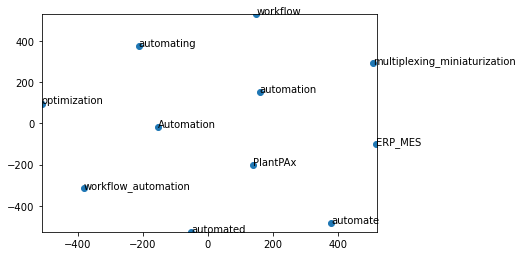

In [41]:
display_closestwords_tsnescatterplot(model, 'automation')